In [1]:
import discord
import logging
import os

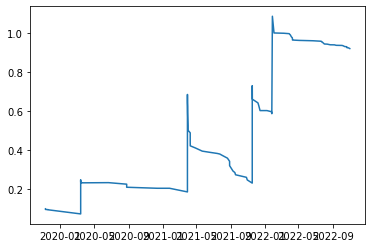

In [2]:
#Setup API key to Etherscan

from requests import get
from matplotlib import pyplot as plt
from datetime import datetime

API_KEY = "Q8MG68CPTZGMTGPUPGZECVRW3JE816VMY9"
BASE_URL = "https://api.etherscan.io/api"
ETHER_VALUE = 10 ** 18

def make_api_url(module, action, address, **kwargs):
    url = BASE_URL + f"?module={module}&action={action}&address={address}&apikey={API_KEY}"

    for key, value in kwargs.items():
        url += f"&{key}={value}"

    return url

def get_account_balance(address):
    balance_url = make_api_url("account", "balance", address, tag="latest")
    response = get(balance_url)
    data = response.json()

    value = int(data["result"]) / ETHER_VALUE
    return value

def get_transactions(address):
    transactions_url = make_api_url("account", "txlist", address, startblock=0, endblock=99999999, page=1, offset=10000, sort="asc")
    response = get(transactions_url)
    data = response.json()["result"]

    internal_tx_url = make_api_url("account", "txlistinternal", address, startblock=0, endblock=99999999, page=1, offset=10000, sort="asc")
    response2 = get(internal_tx_url)
    data2 = response2.json()["result"]

    data.extend(data2)
    data.sort(key=lambda x: int(x['timeStamp']))

    current_balance = 0
    balances = []
    times = []

    for tx in data:
        to = tx["to"]
        from_addr = tx["from"]
        value = int(tx["value"]) / ETHER_VALUE

        if "gasPrice" in tx:
            gas = int(tx["gasUsed"]) * int(tx["gasPrice"]) / ETHER_VALUE
        else:
            gas = int(tx["gasUsed"]) / ETHER_VALUE

        time = datetime.fromtimestamp(int(tx['timeStamp']))
        money_in = to.lower() == address.lower()

        if money_in:
            current_balance += value
        else:
            current_balance -= value + gas

        balances.append(current_balance)
        times.append(time)

    plt.plot(times, balances)
    plt.show()


address = "0x05e793ce0c6027323ac150f6d45c2344d28b6019"
get_transactions(address)

In [ ]:
#Configure logs

In [ ]:
#